In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize the data
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("Train data shape:", X_train.shape)
print("Output train data shape:", y_train.shape)

Train data shape: (50000, 32, 32, 3)
Output train data shape: (50000,)


In [5]:
# number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [7]:
# Build the model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4970 - accuracy: 0.4550 - val_loss: 1.2960 - val_accuracy: 0.5399
Epoch 2/15
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1704 - accuracy: 0.5830 - val_loss: 1.0733 - val_accuracy: 0.6152
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0156 - accuracy: 0.6414 - val_loss: 0.9739 - val_accuracy: 0.6513
Epoch 4/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8908 - accuracy: 0.6832 - val_loss: 0.9315 - val_accuracy: 0.6683
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7873 - accuracy: 0.7205 - val_loss: 0.9172 - val_accuracy: 0.6851
Epoch 6/15
1563/1563 [==============================] - 52s 34ms/step - loss: 0.6964 - accuracy: 0.7556 - val_loss: 0.9029 - val_accuracy: 0.6858
Epoch 7/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6161 - accuracy: 0.7814 - val_loss: 0.9231 -

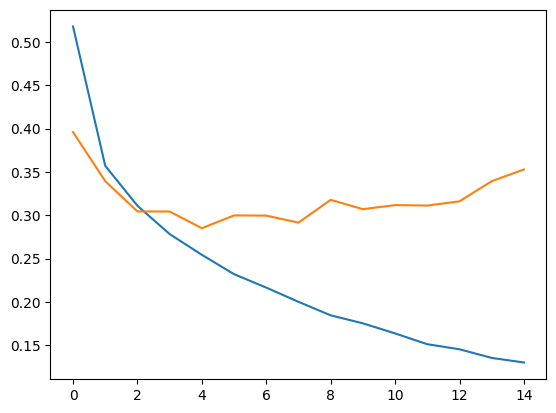

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

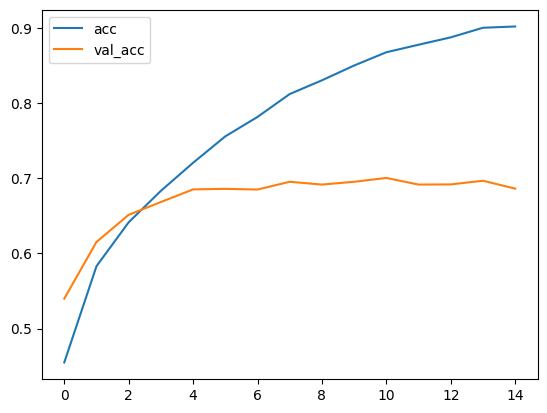

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 5s 16ms/step
Confusion matrix, without normalization
[[740  23  48  27  30   8  11  13  74  26]
 [ 14 812   8  18   8   6  18   8  30  78]
 [ 54   7 524  82  91  78 104  39  14   7]
 [ 24   9  53 490  67 183  90  53  13  18]
 [ 19   4  49  66 639  44  86  71  16   6]
 [ 14   4  32 181  52 596  43  68   6   4]
 [  4   6  23  58  33  38 813  15   6   4]
 [ 10   3  29  40  76  69  13 750   5   5]
 [ 58  42  21  20   6   5  12  10 803  23]
 [ 43 116   8  28   8  13  18  28  44 694]]


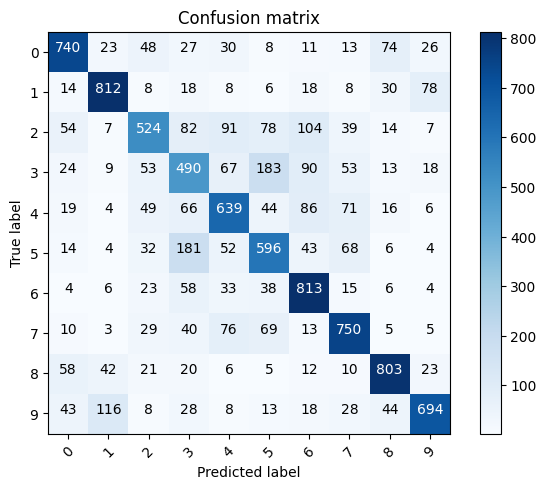

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

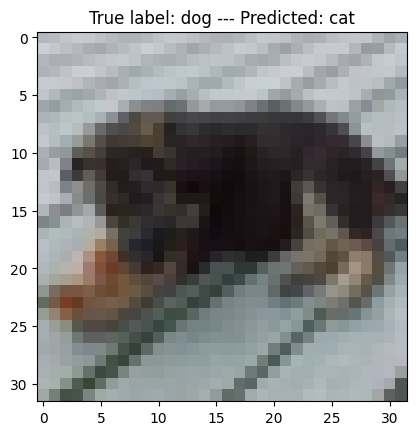

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s --- Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));